In [7]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [8]:
NNE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test57 NNE1.csv.csv")
NNE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test58 NNE2.csv.csv")
NNE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test59 NNE3.csv.csv")
NNE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test60 NNE4.csv.csv")
NNE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test61 NNE5.csv.csv")

In [9]:
#Loading the corresponding force data
force_NNE1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#57 NNE1.log" , delimiter = "\t")
force_NNE2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#58 NNE2.log" , delimiter = "\t")
force_NNE3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#59 NNE3.log" , delimiter = "\t")
force_NNE4 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#60 NNE4.log" , delimiter = "\t")
force_NNE5 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#61 NNE5.log" , delimiter = "\t")

In [10]:
#Visulizing the force data - test #2 - 6 - NE1-5
plt.figure(figsize=(50, 30))

#Time for force
x_force_NNE1 = force_NNE1["Time"]
x_force_NNE2 = force_NNE2["Time"]
x_force_NNE3 = force_NNE3["Time"]
x_force_NNE4 = force_NNE4["Time"]
x_force_NNE5 = force_NNE5["Time"]

#force
Load_NNE1 = force_NNE1["Load"]
Load_NNE2 = force_NNE2["Load"]
Load_NNE3 = force_NNE3["Load"]
Load_NNE4 = force_NNE4["Load"]
Load_NNE5 = force_NNE5["Load"]

#plt.plot(x_force_NE1,Load_NE1,color = 'green', label = 'force data NE1 test #2' )
#plt.plot(x_force_NE2,Load_NE2,color = 'blue', label = 'force data NE2 test #2' )
# plt.plot(x_force_NE3,Load_NE3,color = 'yellow', label = 'force data NE3 test #2' )
# plt.plot(x_force_NE4,Load_NE4,color = 'red', label = 'force data NE4 test #2' )
# plt.plot(x_force_NE5,Load_NE5,color = 'brown', label = 'force data NE5 test #2' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for NNE1


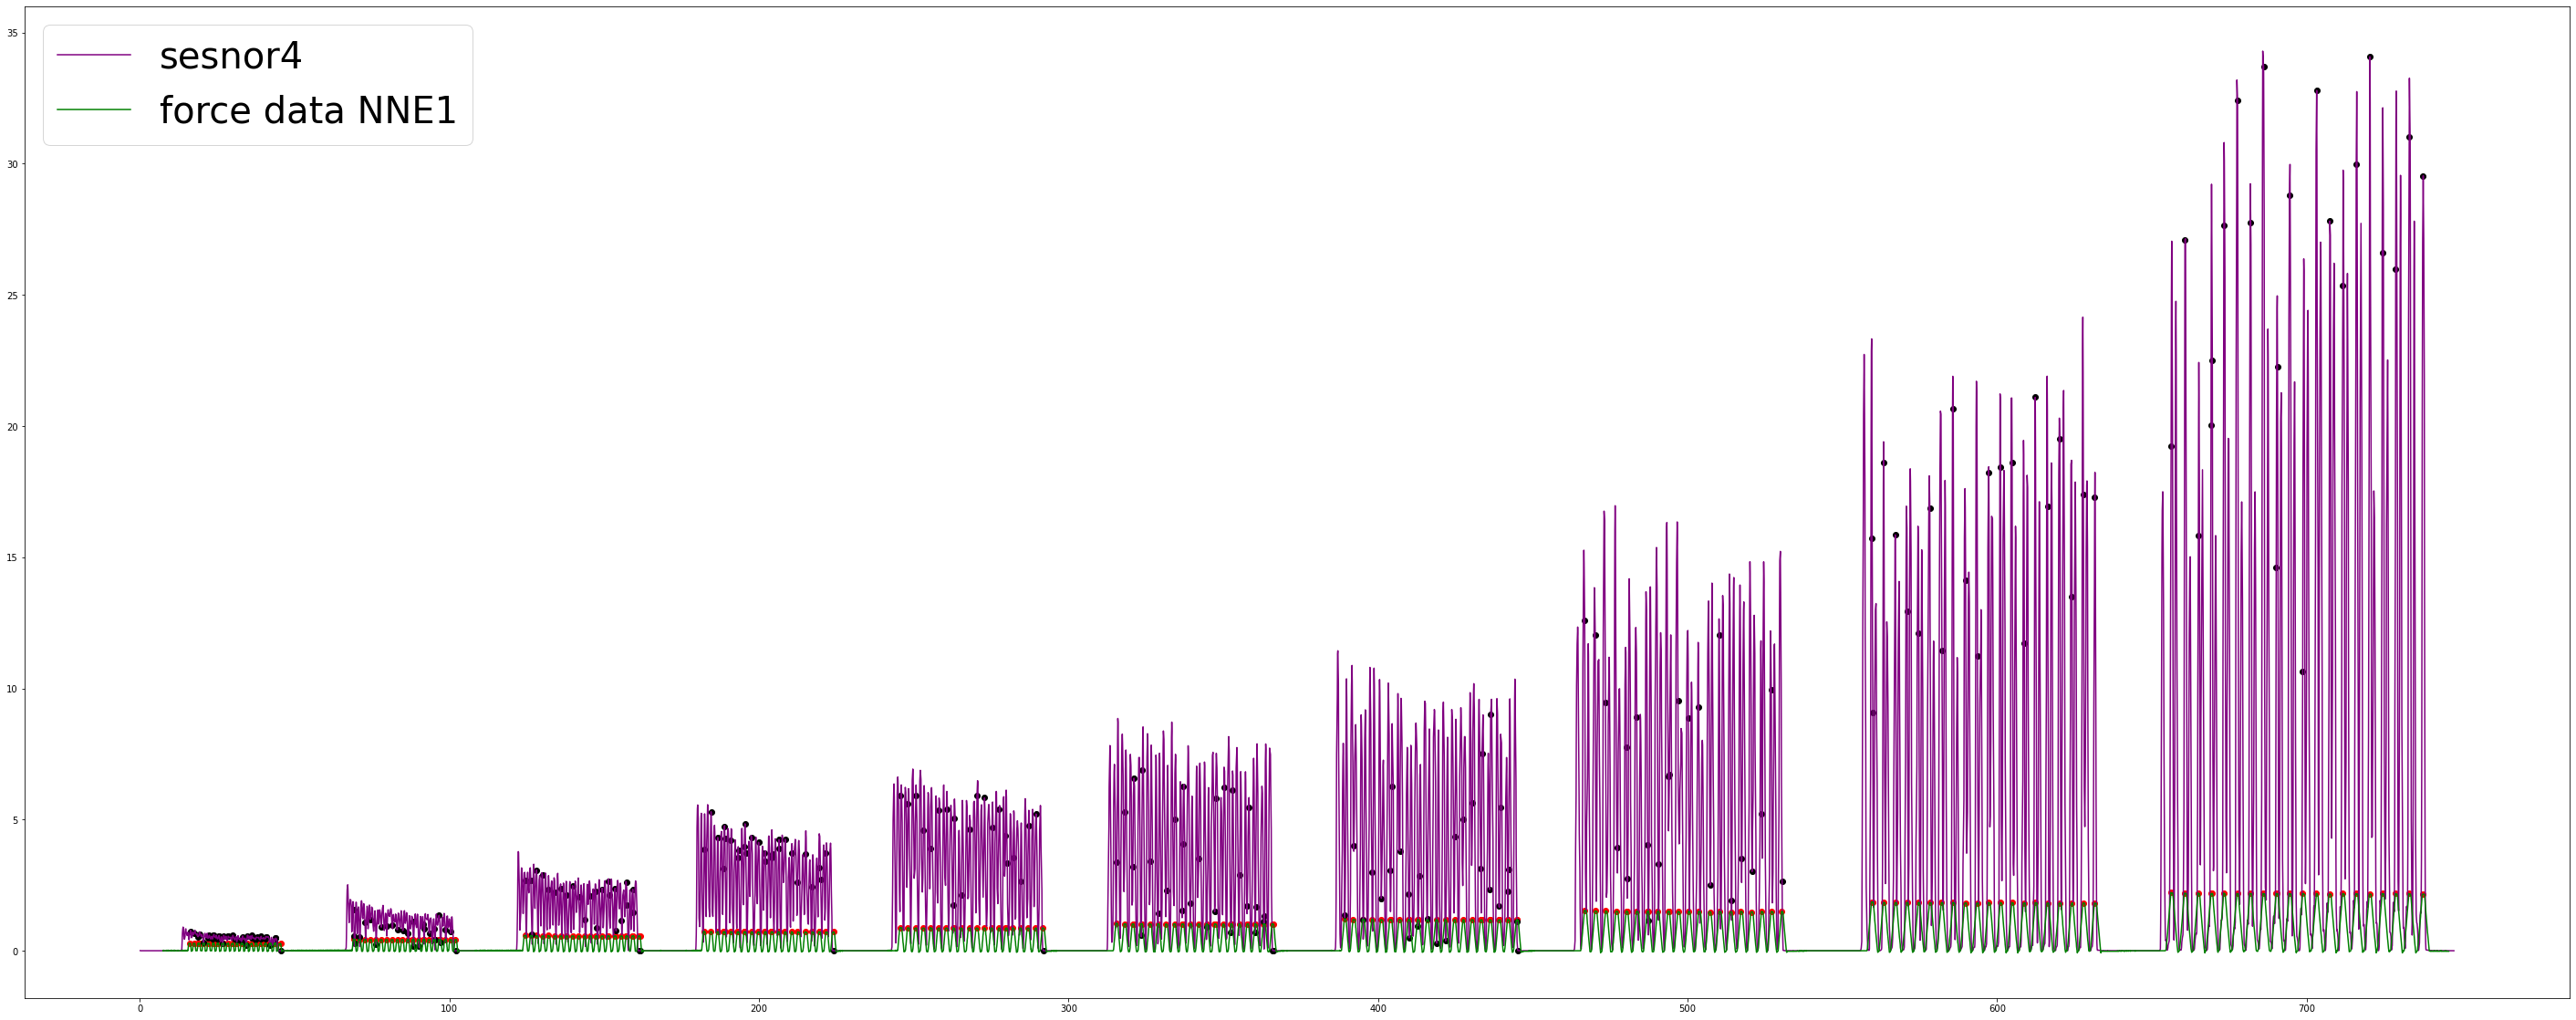

In [11]:
#visualizing the resistance data for each sensor NNE 1- 5 - NNE1

plt.figure(figsize=(50, 20))

# plt.plot(NNE1["Unnamed: 0"],NNE1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNE1["Unnamed: 0"],NNE1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNE1["Unnamed: 0"],NNE1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNE1["Unnamed: 0"],NNE1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNE1 = x_force_NNE1 + 7.5
scaled_NNE1 = NNE1["Unnamed: 0"]

plt.plot(scaled_NNE1,NNE1["s4_d"], color = 'purple', label = 'sesnor4')
plt.plot(scaled_x_force_NNE1,Load_NNE1,color = 'green', label = 'force data NNE1' )

plt.legend(fontsize=40)

print("Sensor 4 is more profound for NNE1")

#finding the peaks

pidx_Load_NNE1, _ = find_peaks(Load_NNE1,prominence= 0.1 )
peaks_Load_NNE1 = Load_NNE1[pidx_Load_NNE1]
peaks_Ltime_NNE1 = scaled_x_force_NNE1[pidx_Load_NNE1]

plt.scatter(peaks_Ltime_NNE1,peaks_Load_NNE1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNE1time = []

peaks_Ltime_NNE1.reset_index(drop = True, inplace = True)
peaks_Load_NNE1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNE1)):
    idx_NNE1time.append(bisect.bisect_left(NNE1["Unnamed: 0"], peaks_Ltime_NNE1[i]))

plt.scatter(NNE1["Unnamed: 0"][idx_NNE1time],NNE1["s4_d"][idx_NNE1time],color = 'black')

In [12]:
#Storing the peaks into csv file - NNE1
Load_NNE1peaks =[]

for i in range(len(peaks_Load_NNE1)):
    Load_NNE1peaks.append(peaks_Load_NNE1[i])
    
content_NNE1 = {'R1':NNE1["s1_d"][idx_NNE1time],
              'R2':NNE1["s2_d"][idx_NNE1time],
              'R3':NNE1["s3_d"][idx_NNE1time],
              'R4':NNE1["s4_d"][idx_NNE1time], 
              'Load': Load_NNE1peaks} 

df_NNE1 = pd.DataFrame(content_NNE1, columns = ['R1','R2','R3','R4','Load'])

df_NNE1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNE1.csv',index = False, header = True)

Sensor 1 is more profound for NNE2


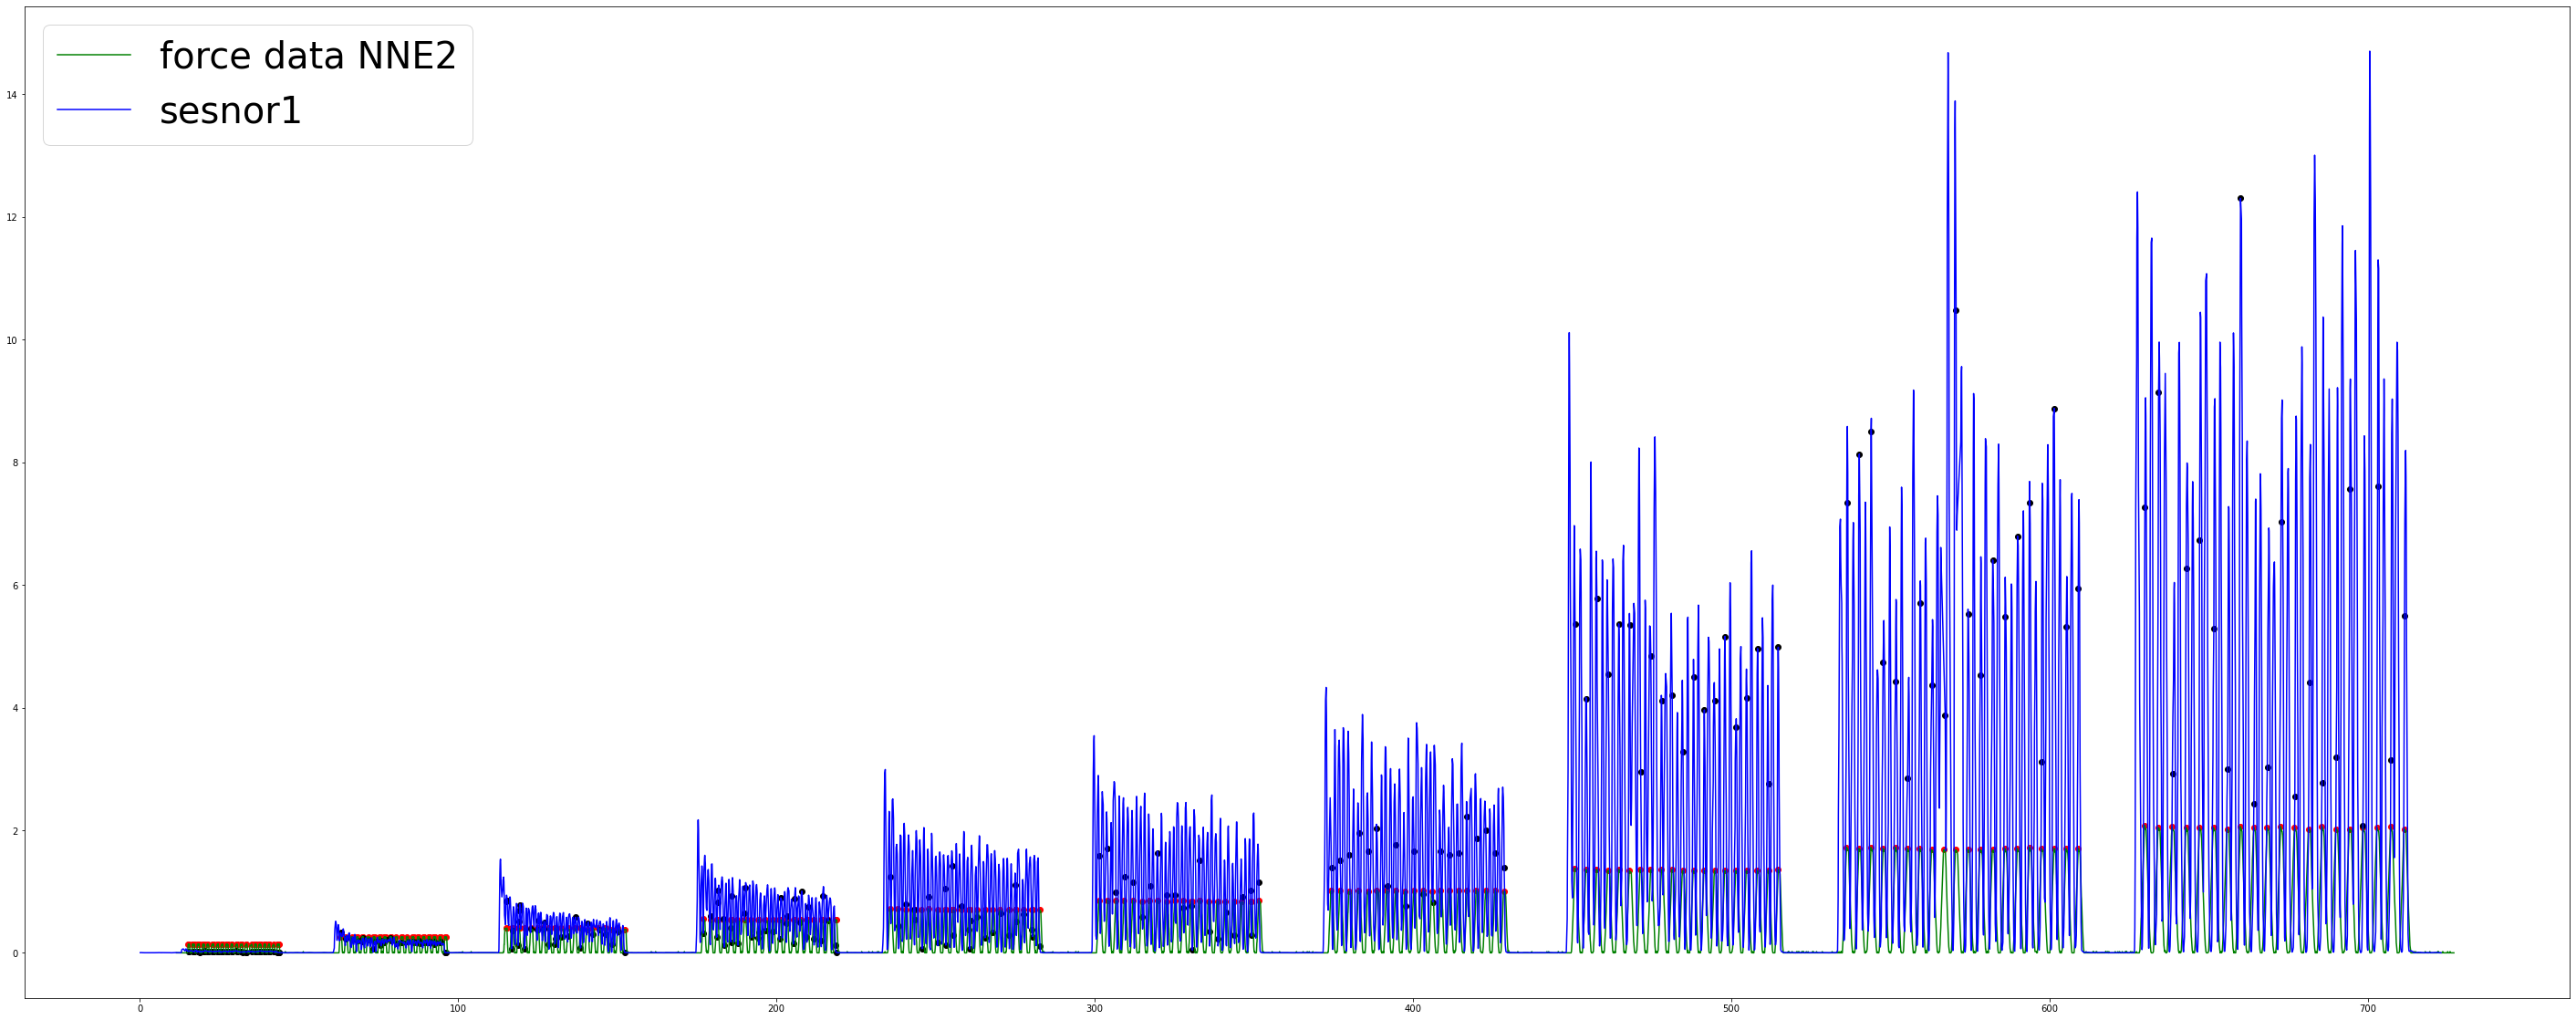

In [13]:
#visualizing the resistance data for each sensor NNE 1- 5 - NNE2

plt.figure(figsize=(50, 20))

# plt.plot(NNE2["Unnamed: 0"],NNE2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNE2["Unnamed: 0"],NNE2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNE2["Unnamed: 0"],NNE2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNE2["Unnamed: 0"],NNE2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNE2 = x_force_NNE2 + 11.5
scaled_NNE2 = NNE2["Unnamed: 0"]

plt.plot(scaled_x_force_NNE2,Load_NNE2,color = 'green', label = 'force data NNE2' )
plt.plot(scaled_NNE2,NNE2["s1_d"], color = 'blue', label = 'sesnor1')


plt.legend(fontsize=40)

print("Sensor 1 is more profound for NNE2")

#finding the peaks

pidx_Load_NNE2, _ = find_peaks(Load_NNE2,prominence= 0.1 )
peaks_Load_NNE2 = Load_NNE2[pidx_Load_NNE2]
peaks_Ltime_NNE2 = scaled_x_force_NNE2[pidx_Load_NNE2]

plt.scatter(peaks_Ltime_NNE2,peaks_Load_NNE2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNE2time = []

peaks_Ltime_NNE2.reset_index(drop = True, inplace = True)
peaks_Load_NNE2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNE2)):
    idx_NNE2time.append(bisect.bisect_left(NNE2["Unnamed: 0"], peaks_Ltime_NNE2[i]))

plt.scatter(NNE2["Unnamed: 0"][idx_NNE2time],NNE2["s1_d"][idx_NNE2time],color = 'black')

In [14]:
#Storing the peaks into csv file - NNE2
Load_NNE2peaks =[]

for i in range(len(peaks_Load_NNE2)):
    Load_NNE2peaks.append(peaks_Load_NNE2[i])
    
content_NNE2 = {'R1':NNE2["s1_d"][idx_NNE2time],
              'R2':NNE2["s2_d"][idx_NNE2time],
              'R3':NNE2["s3_d"][idx_NNE2time],
              'R4':NNE2["s4_d"][idx_NNE2time], 
              'Load': Load_NNE2peaks} 

df_NNE2 = pd.DataFrame(content_NNE2, columns = ['R1','R2','R3','R4','Load'])

df_NNE2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNE2.csv',index = False, header = True)

Sensor 1 is more profound for NNE3


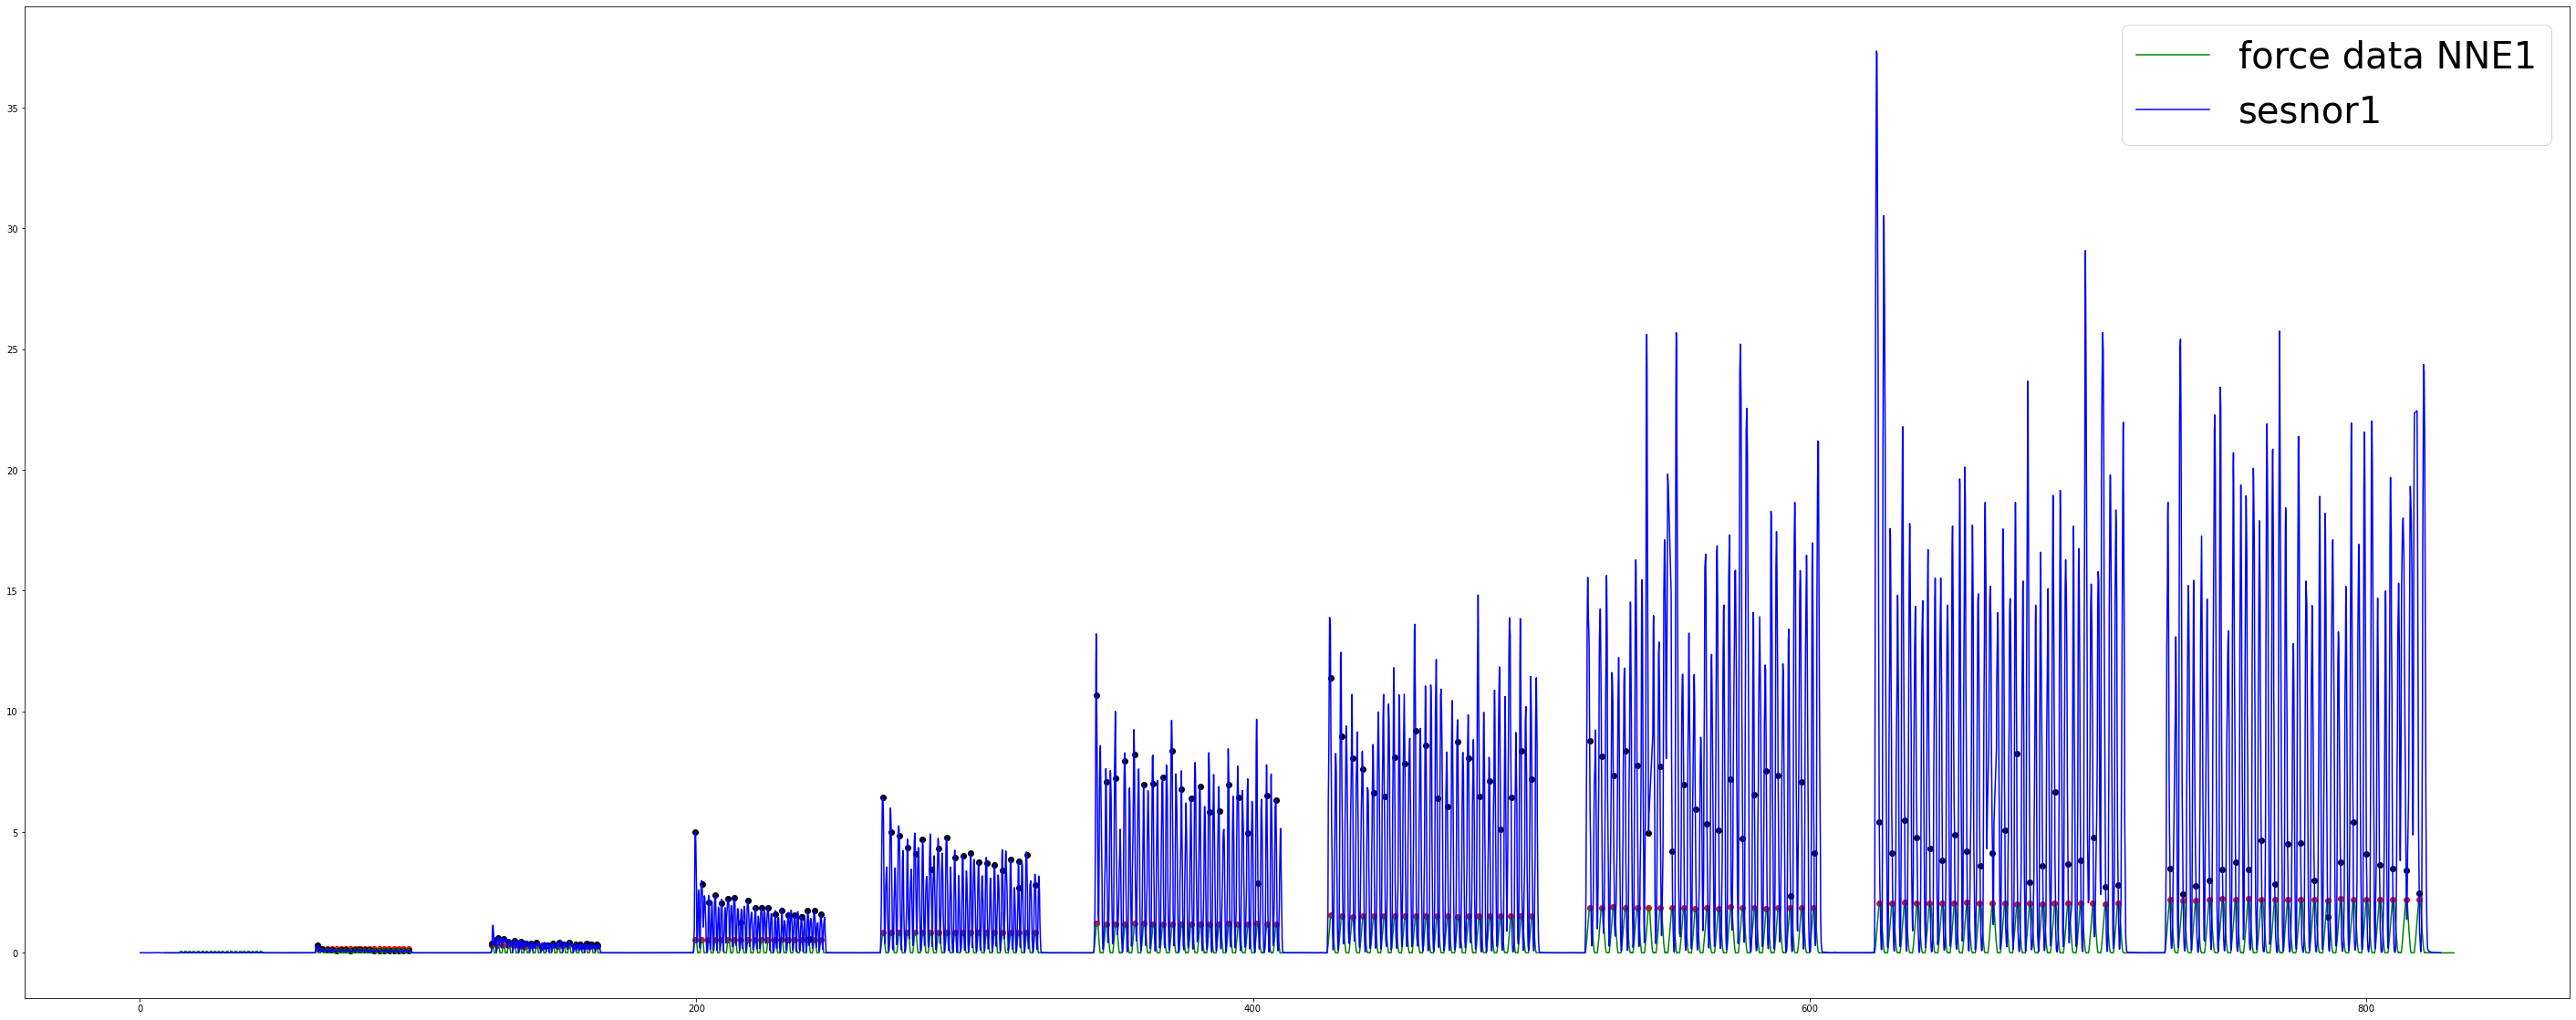

In [15]:
#visualizing the resistance data for each sensor NNE 1- 5 - NNE3

plt.figure(figsize=(50, 20))

# plt.plot(NNE3["Unnamed: 0"],NNE3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNE3["Unnamed: 0"],NNE3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNE3["Unnamed: 0"],NNE3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNE3["Unnamed: 0"],NNE3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNE3 = x_force_NNE3 + 9

scaled_NNE3 = NNE3["Unnamed: 0"]

plt.plot(scaled_x_force_NNE3,Load_NNE3,color = 'green', label = 'force data NNE1')
plt.plot(scaled_NNE3,NNE3["s1_d"], color = 'blue', label = 'sesnor1')


plt.legend(fontsize=40)

print("Sensor 1 is more profound for NNE3")

#finding the peaks

pidx_Load_NNE3, _ = find_peaks(Load_NNE3,prominence= 0.1 )
peaks_Load_NNE3 = Load_NNE3[pidx_Load_NNE3]
peaks_Ltime_NNE3 = scaled_x_force_NNE3[pidx_Load_NNE3]

plt.scatter(peaks_Ltime_NNE3,peaks_Load_NNE3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNE3time = []

peaks_Ltime_NNE3.reset_index(drop = True, inplace = True)
peaks_Load_NNE3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNE3)):
    idx_NNE3time.append(bisect.bisect_left(NNE3["Unnamed: 0"], peaks_Ltime_NNE3[i]))

plt.scatter(NNE3["Unnamed: 0"][idx_NNE3time],NNE3["s1_d"][idx_NNE3time],color = 'black')

In [16]:
#Storing the peaks into csv file - NNE3
Load_NNE3peaks =[]

for i in range(len(peaks_Load_NNE3)):
    Load_NNE3peaks.append(peaks_Load_NNE3[i])
    
content_NNE3 = {'R1':NNE3["s1_d"][idx_NNE3time],
              'R2':NNE3["s2_d"][idx_NNE3time],
              'R3':NNE3["s3_d"][idx_NNE3time],
              'R4':NNE3["s4_d"][idx_NNE3time], 
              'Load': Load_NNE3peaks} 

df_NNE3 = pd.DataFrame(content_NNE3, columns = ['R1','R2','R3','R4','Load'])

df_NNE3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNE3.csv',index = False, header = True)

Sensor 1 and 3 is more profound for NNE4


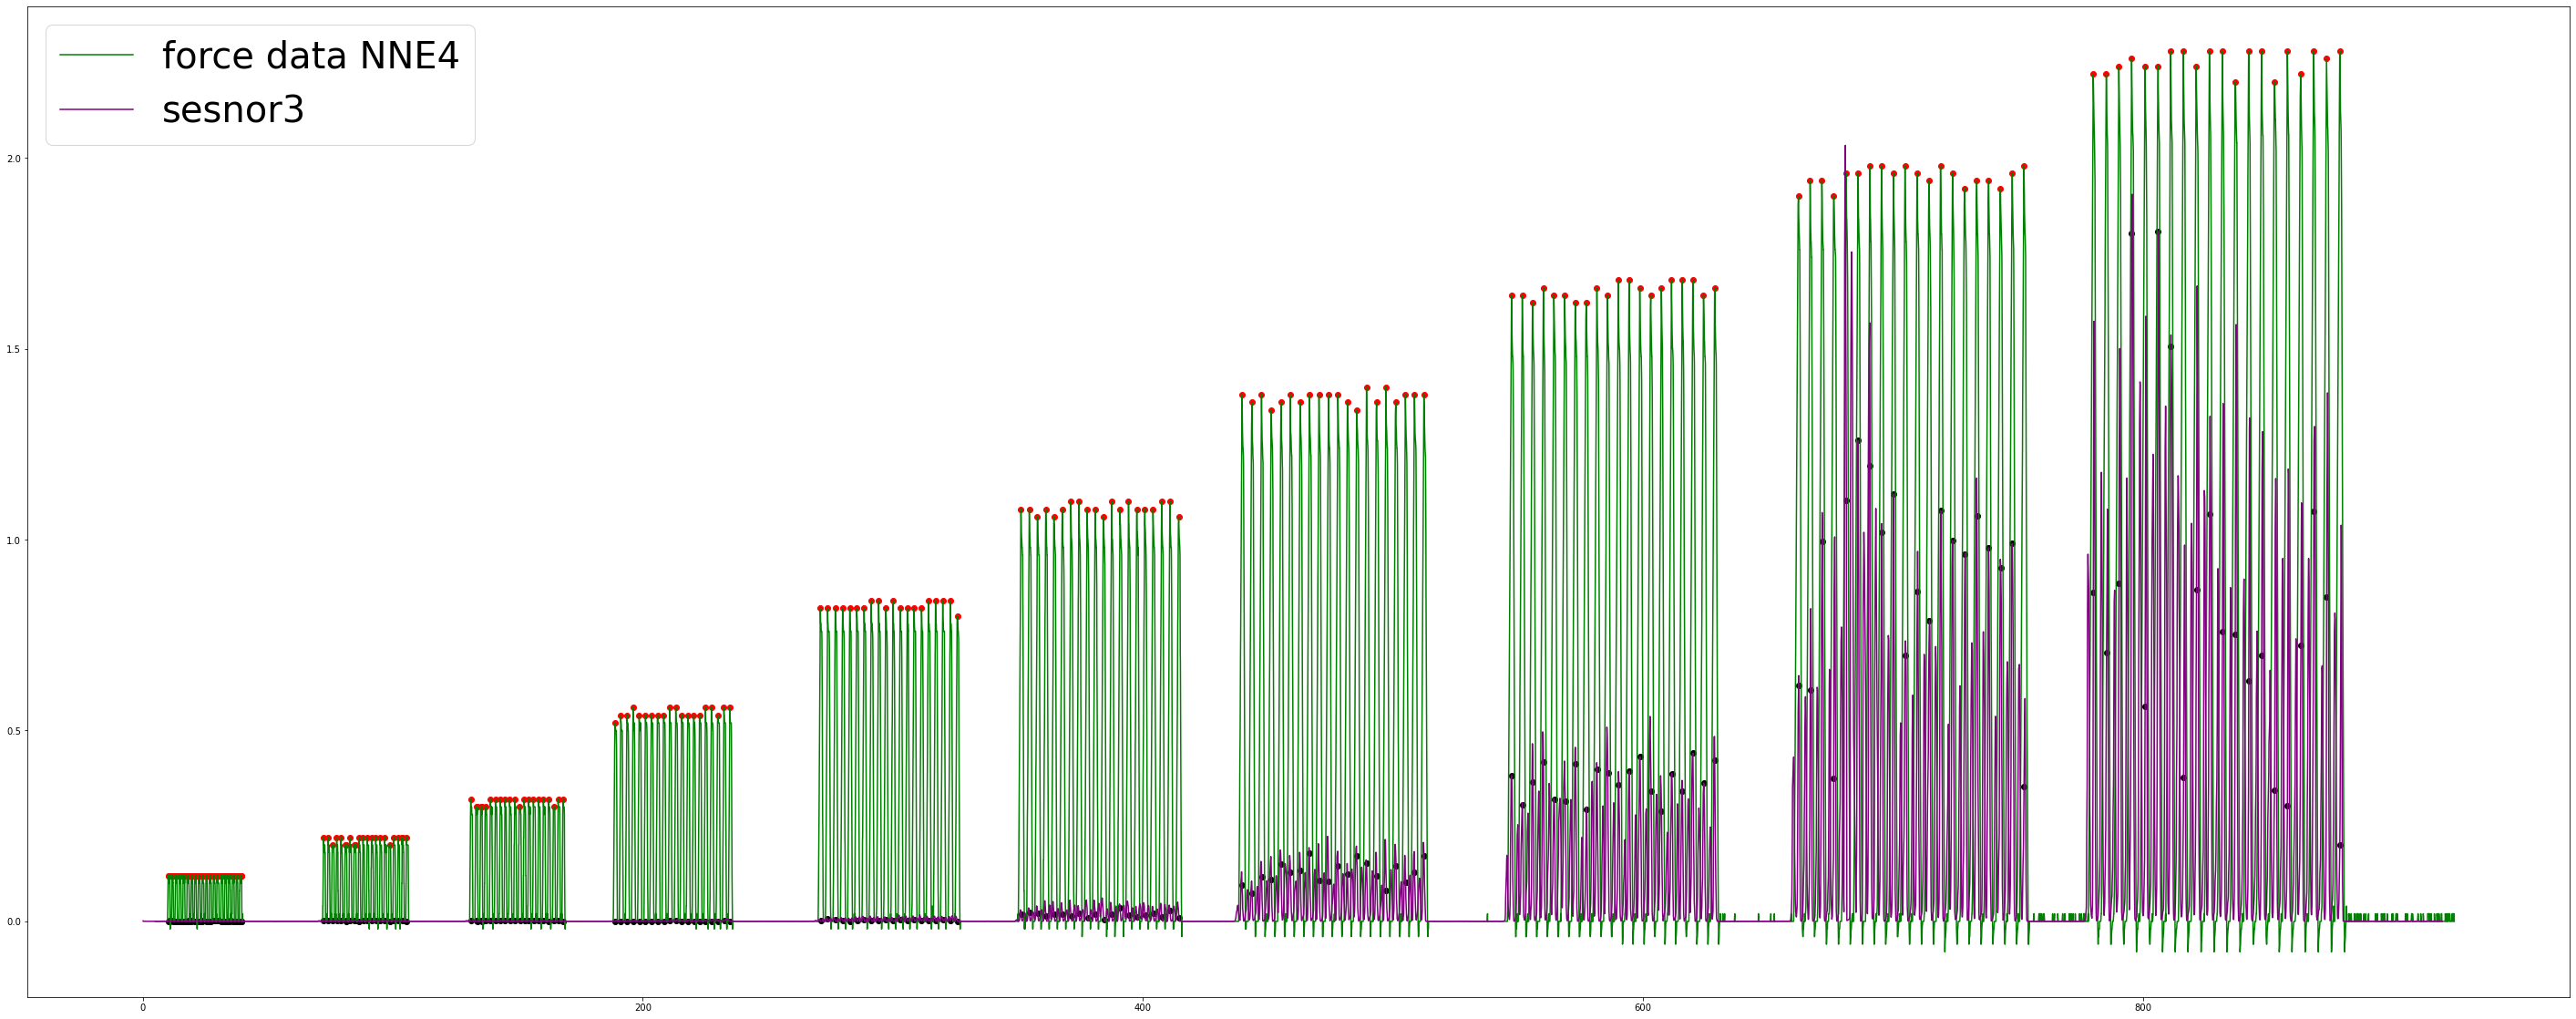

In [17]:
#visualizing the resistance data for each sensor NNE 1- 5 - NNE4

plt.figure(figsize=(50, 20))

# plt.plot(NNE4["Unnamed: 0"],NNE4["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNE4["Unnamed: 0"],NNE4["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNE4["Unnamed: 0"],NNE4["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNE4["Unnamed: 0"],NNE4["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNE4 = x_force_NNE4 + 5
scaled_NNE4 = NNE4["Unnamed: 0"]


plt.plot(scaled_x_force_NNE4,Load_NNE4,color = 'green', label = 'force data NNE4' )
# plt.plot(scaled_NNE4,NNE4["s1_d"], color = 'blue', label = 'sesnor1')
plt.plot(scaled_NNE4,NNE4["s3_d"], color = 'purple', label = 'sesnor3')


plt.legend(fontsize=40)

print("Sensor 1 and 3 is more profound for NNE4")

#finding the peaks

pidx_Load_NNE4, _ = find_peaks(Load_NNE4,prominence= 0.1 )
peaks_Load_NNE4 = Load_NNE4[pidx_Load_NNE4]
peaks_Ltime_NNE4 = scaled_x_force_NNE4[pidx_Load_NNE4]

plt.scatter(peaks_Ltime_NNE4,peaks_Load_NNE4,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNE4time = []

peaks_Ltime_NNE4.reset_index(drop = True, inplace = True)
peaks_Load_NNE4.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNE4)):
    idx_NNE4time.append(bisect.bisect_left(NNE4["Unnamed: 0"], peaks_Ltime_NNE4[i]))

plt.scatter(NNE4["Unnamed: 0"][idx_NNE4time],NNE4["s3_d"][idx_NNE4time],color = 'black')

In [18]:
#Storing the peaks into csv file - NNE4
Load_NNE4peaks =[]

for i in range(len(peaks_Load_NNE4)):
    Load_NNE4peaks.append(peaks_Load_NNE4[i])
    
content_NNE4 = {'R1':NNE4["s1_d"][idx_NNE4time],
              'R2':NNE4["s2_d"][idx_NNE4time],
              'R3':NNE4["s3_d"][idx_NNE4time],
              'R4':NNE4["s4_d"][idx_NNE4time], 
              'Load': Load_NNE4peaks} 

df_NNE4 = pd.DataFrame(content_NNE4, columns = ['R1','R2','R3','R4','Load'])

df_NNE4.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNE4.csv',index = False, header = True)

Sensor 1 and 3 are more profound for NNE5


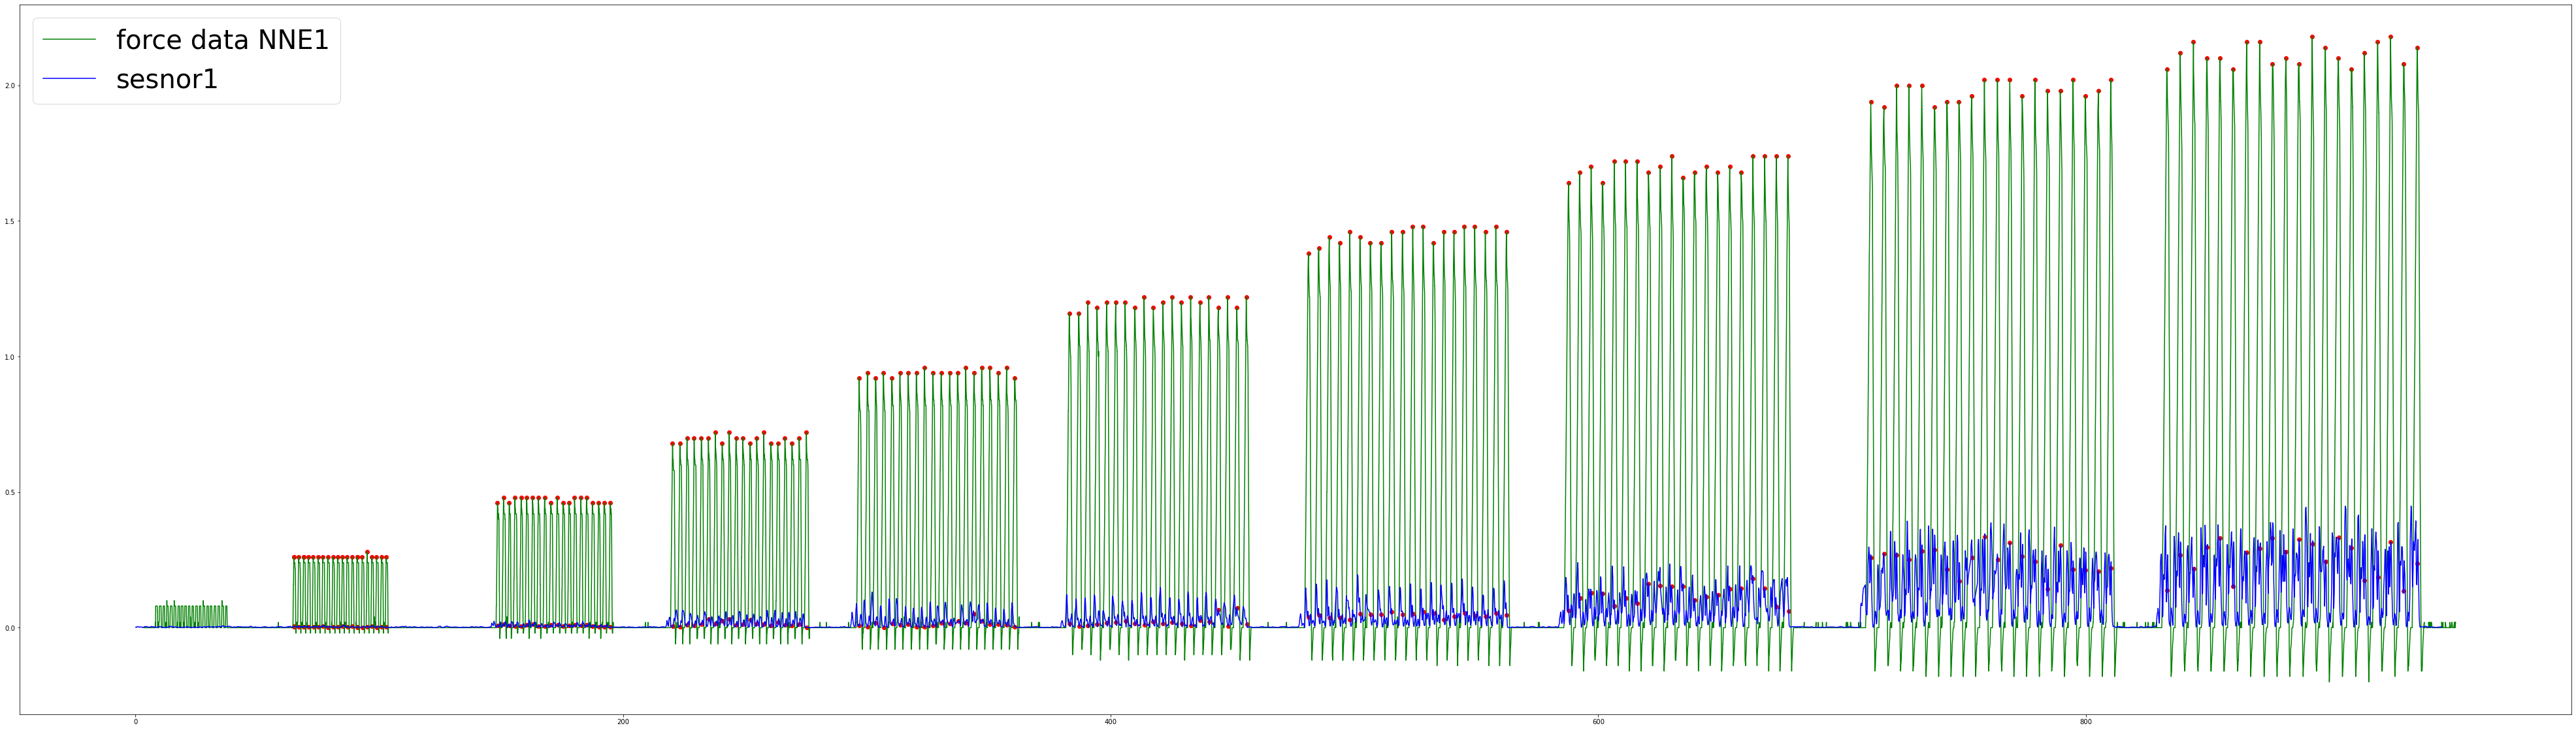

In [19]:
#visualizing the resistance data for each sensor NNE 1- 5 - NNE5

plt.figure(figsize=(70, 20))

# plt.plot(NNE5["Unnamed: 0"],NNE5["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(NNE5["Unnamed: 0"],NNE5["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(NNE5["Unnamed: 0"],NNE5["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(NNE5["Unnamed: 0"],NNE5["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_NNE5 = x_force_NNE5 + 3.5
scaled_NNE5 = NNE5["Unnamed: 0"]

plt.plot(scaled_x_force_NNE5,Load_NNE5,color = 'green', label = 'force data NNE1')
plt.plot(scaled_NNE5,NNE5["s1_d"], color = 'blue', label = 'sesnor1')
# plt.plot(scaled_NNE5,NNE5["s3_d"], color = 'purple', label = 'sesnor3')


plt.legend(fontsize=40)

print("Sensor 1 and 3 are more profound for NNE5")

#finding the peaks

pidx_Load_NNE5, _ = find_peaks(Load_NNE5,prominence= 0.2 )
peaks_Load_NNE5 = Load_NNE5[pidx_Load_NNE5]
peaks_Ltime_NNE5 = scaled_x_force_NNE5[pidx_Load_NNE5]

plt.scatter(peaks_Ltime_NNE5,peaks_Load_NNE5,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_NNE5time = []

peaks_Ltime_NNE5.reset_index(drop = True, inplace = True)
peaks_Load_NNE5.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_NNE5)):
    idx_NNE5time.append(bisect.bisect_left(NNE5["Unnamed: 0"], peaks_Ltime_NNE5[i]))

plt.scatter(NNE5["Unnamed: 0"][idx_NNE5time],NNE5["s1_d"][idx_NNE5time],color = 'red')

In [20]:
#Storing the peaks into csv file - NNE5
Load_NNE5peaks =[]

for i in range(len(peaks_Load_NNE5)):
    Load_NNE5peaks.append(peaks_Load_NNE5[i])
    
content_NNE5 = {'R1':NNE5["s1_d"][idx_NNE5time],
              'R2':NNE5["s2_d"][idx_NNE5time],
              'R3':NNE5["s3_d"][idx_NNE5time],
              'R4':NNE5["s4_d"][idx_NNE5time], 
              'Load': Load_NNE5peaks} 

df_NNE5 = pd.DataFrame(content_NNE5, columns = ['R1','R2','R3','R4','Load'])

df_NNE5.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\NNE5.csv',index = False, header = True)